In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from minisom import MiniSom, asymptotic_decay
import matplotlib.pyplot as plt

In [2]:
ds_2t = xr.open_dataset("/glade/scratch/kiarar/ERA5_2T_1979_2021.nc")
ds_u = xr.open_dataset("/glade/scratch/kiarar/ERA5_U_winds_200_1979_2018.nc")
ds_v = xr.open_dataset("/glade/scratch/kiarar/ERA5_V_winds_200_1979_2018.nc")
ds_Z = xr.open_dataset("/glade/scratch/kiarar/ERA5_geopotential_winds_500_1979_2018.nc")

In [3]:
#slice data in time to make it match the other data... 
ds_2t = ds_2t.isel(time=slice(0,480))

In [4]:
subset_2t = ds_2t["VAR_2T"].stack(new=("latitude", "longitude")).values
subset_u = ds_u["U"].stack(new=("latitude", "longitude")).values
subset_v = ds_v["V"].stack(new=("latitude", "longitude")).values
subset_Z = ds_Z["Z"].stack(new=("latitude", "longitude")).values

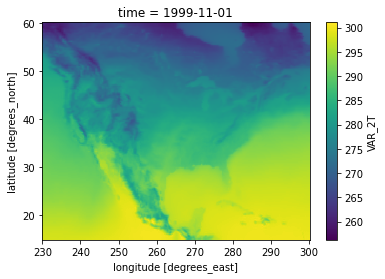

In [5]:
ds_2t["VAR_2T"].sel(time="1999-11-01").plot()

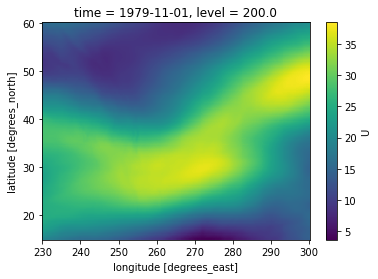

In [6]:
ds_u['U'].isel(time=10).plot()

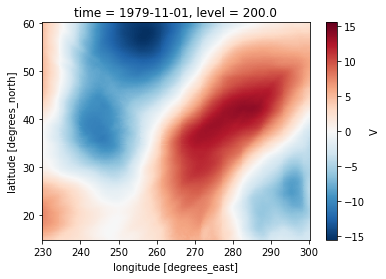

In [7]:
ds_v["V"].isel(time=10).plot()

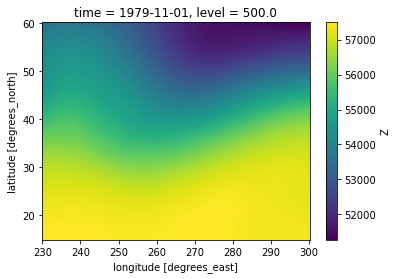

In [8]:
ds_Z["Z"].isel(time=10).plot()

# Self-Organizing Map Training

In [9]:
som_grid_rows = 4
som_grid_columns = 4
input_length = subset_2t.shape[1] 

In [10]:
input_length

50861

In [11]:
sigma = 0.5 # Test 0.1-1
learning_rate = 0.005 # Test 0.0001-0.5 (just 1's and 5's)
decay_function = asymptotic_decay

In [12]:
neighborhood_function = "gaussian"
topology = "rectangular"
activation_distance = 'euclidean'
random_seed = 1

In [13]:
som = MiniSom(
            som_grid_rows,
            som_grid_columns,
            input_length,
            sigma,
            learning_rate,
            decay_function,
            neighborhood_function,
            topology,
            activation_distance,
            random_seed)

In [14]:
def normalize_data(data):
    """
    Function for normalizing data prior to training using z-score
    """
    return (data - np.nanmean(data)) / np.nanstd(data)

In [15]:
data = normalize_data(subset_2t)
num_iteration = 100000
random_order = True
verbose = True

In [16]:
som.random_weights_init(data)

In [17]:
som.train(
        data,
        num_iteration,
        random_order,
        verbose)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 26.140159870877195


In [18]:
som.topographic_error(data)

0.5833333333333334

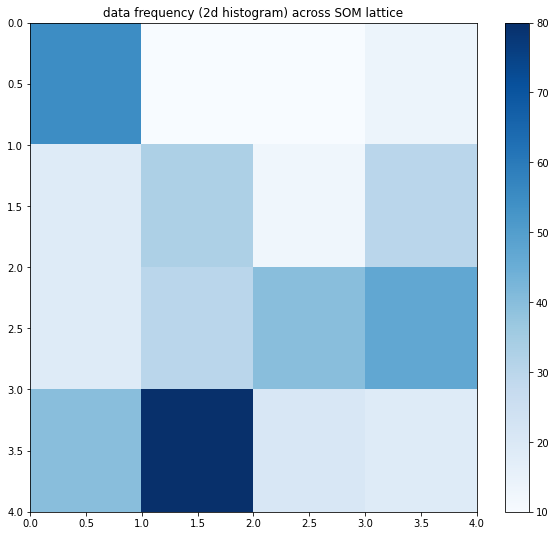

In [19]:
plt.figure(figsize=(10, 9))
frequencies = (som.activation_response(data))
plt.pcolormesh(frequencies, cmap='Blues') 
plt.colorbar()
plt.title("data frequency (2d histogram) across SOM lattice", fontsize=12)
plt.ylim(som_grid_rows, 0)  # flip the y axis to be the same as composite map axes later
#plt.savefig('2t_temp_freq.png', bbox_inches='tight', dpi=200)
plt.show()

# U winds

In [20]:
som_grid_rows = 4
som_grid_columns = 4
input_length2 = subset_u.shape[1] 

In [21]:
sigma = 0.5
learning_rate = 0.005
decay_function = asymptotic_decay

In [22]:
neighborhood_function = "gaussian"
topology = "rectangular"
activation_distance = 'euclidean'
random_seed = 1

In [23]:
som = MiniSom(
            som_grid_rows,
            som_grid_columns,
            input_length2,
            sigma,
            learning_rate,
            decay_function,
            neighborhood_function,
            topology,
            activation_distance,
            random_seed)

In [24]:
def normalize_data(data):
    """
    Function for normalizing data prior to training using z-score
    """
    return (data - np.nanmean(data)) / np.nanstd(data)

In [25]:
data = normalize_data(subset_u)
num_iteration = 100000
random_order = True
verbose = True

In [26]:
som.random_weights_init(data)

In [27]:
som.train(
        data,
        num_iteration,
        random_order,
        verbose)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 90.35851853997012


In [28]:
som.topographic_error(data)

0.5104166666666666

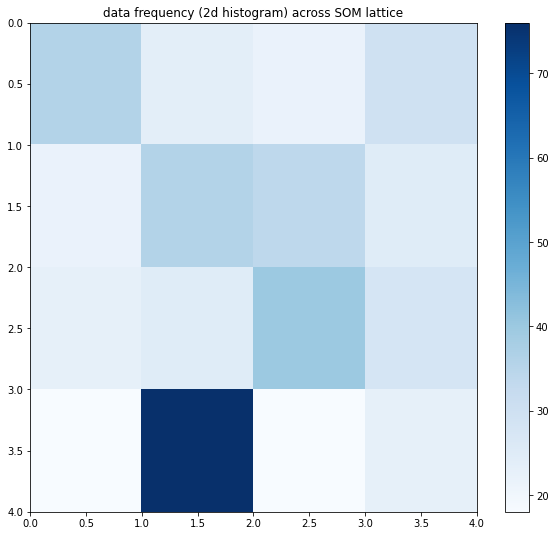

In [29]:
plt.figure(figsize=(10, 9))
frequencies = (som.activation_response(data))
plt.pcolormesh(frequencies, cmap='Blues') 
plt.colorbar()
plt.title("data frequency (2d histogram) across SOM lattice", fontsize=12)
plt.ylim(som_grid_rows, 0)  # flip the y axis to be the same as composite map axes later
#plt.savefig('u_winds_freq.png', bbox_inches='tight', dpi=200)
plt.show()

# V winds

In [30]:
som_grid_rows = 4
som_grid_columns = 4
input_length2 = subset_v.shape[1] 

In [31]:
sigma = 0.5
learning_rate = 0.005
decay_function = asymptotic_decay

In [32]:
neighborhood_function = "gaussian"
topology = "rectangular"
activation_distance = 'euclidean'
random_seed = 1

In [33]:
som = MiniSom(
            som_grid_rows,
            som_grid_columns,
            input_length2,
            sigma,
            learning_rate,
            decay_function,
            neighborhood_function,
            topology,
            activation_distance,
            random_seed)

In [34]:
def normalize_data(data):
    """
    Function for normalizing data prior to training using z-score
    """
    return (data - np.nanmean(data)) / np.nanstd(data)

In [35]:
data = normalize_data(subset_v)
num_iteration = 100000
random_order = True
verbose = True

In [36]:
som.random_weights_init(data)

In [37]:
som.train(
        data,
        num_iteration,
        random_order,
        verbose)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 128.6140066885556


In [38]:
som.topographic_error(data)

0.6145833333333334

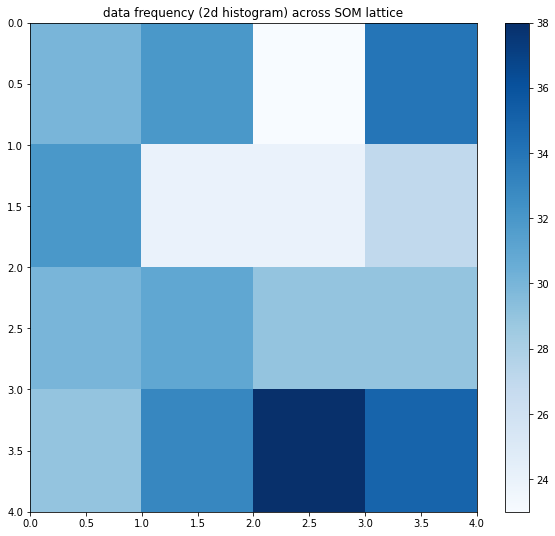

In [39]:
plt.figure(figsize=(10, 9))
frequencies = (som.activation_response(data))
plt.pcolormesh(frequencies, cmap='Blues') 
plt.colorbar()
plt.title("data frequency (2d histogram) across SOM lattice", fontsize=12)
plt.ylim(som_grid_rows, 0)  # flip the y axis to be the same as composite map axes later
#plt.savefig('v_winds_freq.png', bbox_inches='tight', dpi=200)
plt.show()

# Geopotential 

In [40]:
som_grid_rows = 4
som_grid_columns = 4
input_length2 = subset_Z.shape[1] 

In [41]:
sigma = 0.5
learning_rate = 0.005
decay_function = asymptotic_decay

In [42]:
neighborhood_function = "gaussian"
topology = "rectangular"
activation_distance = 'euclidean'
random_seed = 1

In [43]:
som = MiniSom(
            som_grid_rows,
            som_grid_columns,
            input_length2,
            sigma,
            learning_rate,
            decay_function,
            neighborhood_function,
            topology,
            activation_distance,
            random_seed)

In [44]:
def normalize_data(data):
    """
    Function for normalizing data prior to training using z-score
    """
    return (data - np.nanmean(data)) / np.nanstd(data)

In [45]:
data = normalize_data(subset_Z)
num_iteration = 100000
random_order = True
verbose = True

In [46]:
som.random_weights_init(data)

In [47]:
som.train(
        data,
        num_iteration,
        random_order,
        verbose)

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 31.892170883608326


In [48]:
som.topographic_error(data)

0.4041666666666667

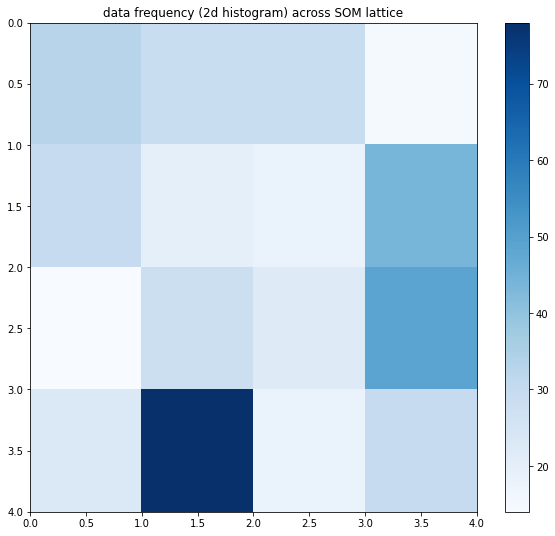

In [49]:
plt.figure(figsize=(10, 9))
frequencies = (som.activation_response(data))
plt.pcolormesh(frequencies, cmap='Blues') 
plt.colorbar()
plt.title("data frequency (2d histogram) across SOM lattice", fontsize=12)
plt.ylim(som_grid_rows, 0)  # flip the y axis to be the same as composite map axes later
#plt.savefig('Z_winds_freq.png', bbox_inches='tight', dpi=200)
plt.show()

# Visualizing Large-Scale Regimes

In [50]:
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from itertools import product

In [51]:
keys = [i for i in product(range(som_grid_rows),range(som_grid_columns))]

In [52]:
winmap = {key: [] for key in keys}
# grab the indices for the data within the SOM lattice
for i, x in enumerate(data):
    winmap[som.winner(x)].append(i)

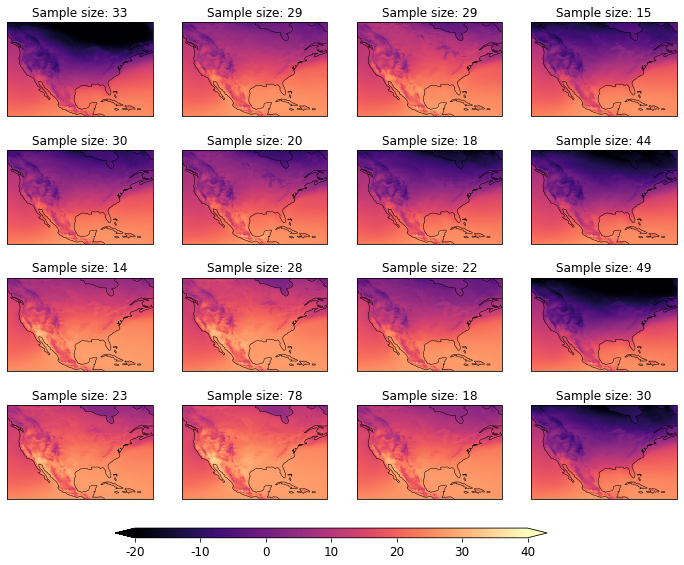

In [53]:
# create a figure using the same dimensions as SOM
fig, axs = plt.subplots(som_grid_rows, som_grid_columns, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(12,9))

# (1) loop through the SOM neurons, (2) grab data samples using SOM indices, (3) compute the mean for each SOM neuron, plot each 

for map_num in range(len(keys)):
    
    # the data
    lt = ds_2t['VAR_2T'][np.array(winmap[keys[map_num]])].coords['latitude'].values
    ln = ds_2t['VAR_2T'][np.array(winmap[keys[map_num]])].coords['longitude'].values
    temp_data = ds_2t["VAR_2T"][np.array(winmap[keys[map_num]])].mean(dim="time", skipna=True).values
    
    # plot
    cs = axs[keys[map_num][0],keys[map_num][1]].pcolormesh(ln, lt, temp_data - 273.15, cmap="magma", vmin=-20, vmax=40, transform=ccrs.PlateCarree())
    
    # title
    axs[keys[map_num][0],keys[map_num][1]].set_title(f"Sample size: {int(frequencies.flatten()[map_num])}", fontsize=12)
    
    # kwargs
    axs[keys[map_num][0],keys[map_num][1]].coastlines(resolution='110m', color='k', linewidth=0.5, zorder=10)
    axs[keys[map_num][0],keys[map_num][1]].margins(x=0,y=0)
    
# colorbar stuff
cax = plt.axes([0.25, 0.075, 0.5, 0.015])
cbar = plt.colorbar(cs, orientation="horizontal", cax=cax, extend='both')
cbar.set_ticks([-20,-10,0,10,20,30,40])
cbar.ax.set_xticklabels([-20,-10,0,10,20,30,40],fontsize=12)
    
#plt.savefig('u_winds_freq2.png', bbox_inches='tight', dpi=200)
plt.show()

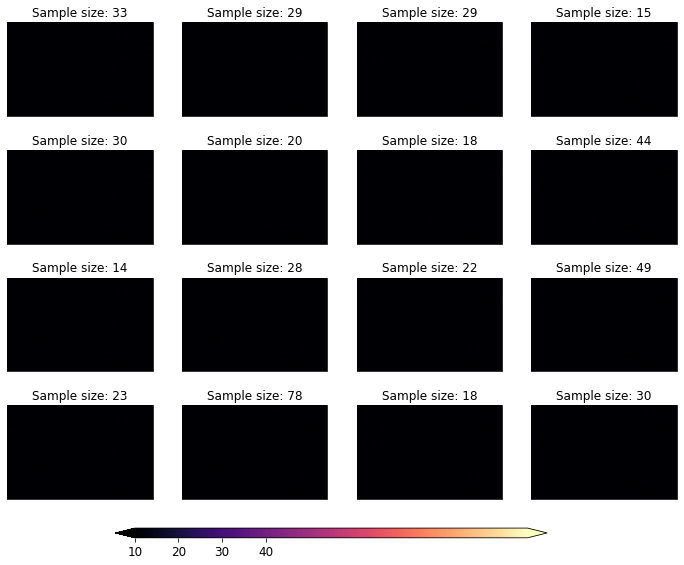

In [54]:
# create a figure using the same dimensions as SOM
fig, axs = plt.subplots(som_grid_rows, som_grid_columns, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(12,9))

# (1) loop through the SOM neurons, (2) grab data samples using SOM indices, (3) compute the mean for each SOM neuron, plot each 

for map_num in range(len(keys)):
    
    # the data
    lt = ds_u['U'][np.array(winmap[keys[map_num]])].coords['latitude'].values
    ln = ds_u['U'][np.array(winmap[keys[map_num]])].coords['longitude'].values
    temp_data = ds_u['U'][np.array(winmap[keys[map_num]])].mean(dim="time", skipna=True).values
    
    # plot
    cs = axs[keys[map_num][0],keys[map_num][1]].pcolormesh(ln, lt, temp_data - 273.15, cmap="magma",vmin=10, vmax=100, transform=ccrs.PlateCarree())
    
    # title
    axs[keys[map_num][0],keys[map_num][1]].set_title(f"Sample size: {int(frequencies.flatten()[map_num])}", fontsize=12)
    
    # kwargs
    axs[keys[map_num][0],keys[map_num][1]].coastlines(resolution='110m', color='k', linewidth=0.5, zorder=10)
    axs[keys[map_num][0],keys[map_num][1]].margins(x=0,y=0)
    
# colorbar stuff
cax = plt.axes([0.25, 0.075, 0.5, 0.015])
cbar = plt.colorbar(cs, orientation="horizontal", cax=cax, extend='both')
cbar.set_ticks([-20,-10,0,10,20,30,40])
cbar.ax.set_xticklabels([-20,-10,0,10,20,30,40],fontsize=12)
    
#plt.savefig('v_winds_freq2.png', bbox_inches='tight', dpi=200)
plt.show()